<a href="https://colab.research.google.com/github/AndreiAf02/Math574_Project/blob/main/SIR_Fitting_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc as pm
%matplotlib inline
import arviz as az
import seaborn as sns

from pymc.ode import DifferentialEquation
from scipy.integrate import odeint

##Google Trends Data:

In [36]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/Math574_Project/main/'

In [37]:
data_Google = pd.read_csv(path_to_data + "Google_trends_V2.csv", sep=",", header=0)
data_Google

,Day_trump,trump_scaled,Day_v2,iran_scaled,moo deng,raygun_scaled,moo_deng_scaled,columb_dna,Day,brics,Mpox
0,2024-07-02,3052.503053,2024-07-25,626.566416,0.000000,0.000000,0,0,2024-08-01,75,0.0
1,2024-07-03,3052.503053,2024-07-26,751.879699,0.000000,0.000000,0,0,2024-08-02,100,62.5
2,2024-07-04,3052.503053,2024-07-27,877.192982,0.000000,0.000000,0,0,2024-08-03,125,0.0
3,2024-07-05,2035.002035,2024-07-28,877.192982,0.000000,0.000000,0,0,2024-08-04,125,62.5
4,2024-07-06,2035.002035,2024-07-29,877.192982,0.000000,0.000000,0,0,2024-08-05,125,62.5
...,...,...,...,...,...,...,...,...,...,...,...
88,2024-09-28,3052.503053,2024-10-21,1378.446116,19.047619,23.809524,100,1,2024-10-28,675,62.5
89,2024-09-29,3052.503053,2024-10-22,1503.759399,19.047619,23.809524,105,0,2024-10-29,500,62.5
90,2024-09-30,3052.503053,2024-10-23,1253.132832,19.047619,23.809524,100,4,2024-10-30,400,187.5
91,2024-10-01,3052.503053,2024-10-24,1253.132832,19.047619,47.619048,105,2,2024-10-31,350,125.0


In [38]:
## Code inspired by https://stackoverflow.com/questions/66466080/insert-empty-rows-after-each-row

insert_rows = 2

def interpolator(data, label):
    data.index = range(0, insert_rows * len(data), insert_rows)
    new_data = data.reindex(index = range(insert_rows * len(data)))
    new_data = new_data.interpolate(method='linear')
    new_data = new_data[:-2]
    plt.plot(new_data, 'm.-')
    plt.title(label)
    plt.xlabel('Day')
    plt.ylabel('Activity')
    return new_data

#Rachael Gunn ('Raygun'):

         raygun
0      0.000000
1    261.904762
2   1523.809524
3   2047.619048
4   2380.952381
5   2119.047619
6   1666.666667
7   1833.333334
8   1452.380953
9    952.380953
10   833.333333
11   547.619047
12   333.333333
13   238.095238
14   214.285714
15   166.666667
16   166.666667
17   142.857143
18    95.238095
19    71.428571
20    71.428571
21    71.428571
22    71.428571
23    95.238095
24    71.428571
25    71.428571
26    47.619048


Text(0, 0.5, 'Activity')

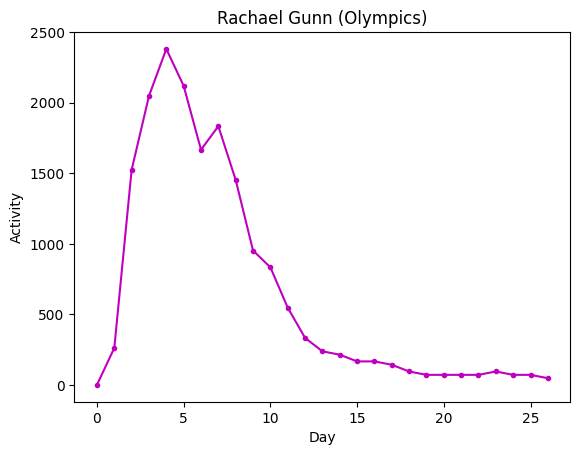

In [39]:
data_raygun=pd.DataFrame()
data_raygun['raygun'] = data_Google['raygun_scaled']
data_raygun = data_raygun[14:41].reset_index(drop=True)

# data_raygun.reset_index(drop=True)
print(data_raygun)
plt.plot(data_raygun, 'm.-')
plt.title('Rachael Gunn (Olympics)')
plt.xlabel('Day')
plt.ylabel('Activity')

          raygun
0       0.000000
1     261.904762
2    1785.714286
3    3833.333334
4    6214.285715
5    8333.333334
6   10000.000001
7   11833.333335
8   13285.714288
9   14238.095240
10  15071.428574
11  15619.047621
12  15952.380955
13  16190.476193
14  16404.761907
15  16571.428574
16  16738.095241
17  16880.952383
18  16976.190479
19  17047.619050
20  17119.047622
21  17190.476193
22  17261.904765
23  17357.142860
24  17428.571431
25  17500.000003
26  17547.619050


Text(0, 0.5, 'Activity')

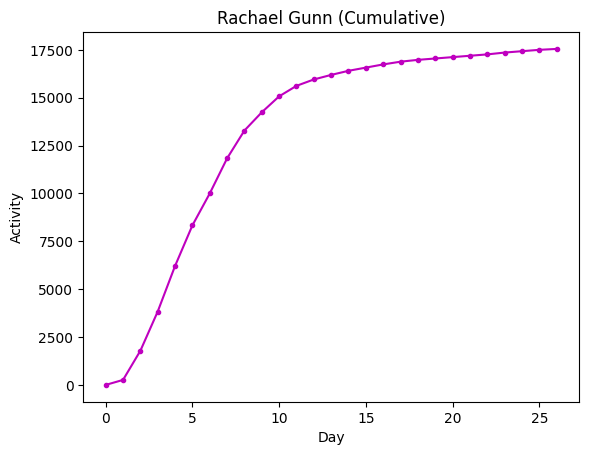

In [40]:
data_raygun_cumul = np.cumsum(data_raygun)
print(data_raygun_cumul)
plt.plot(data_raygun_cumul, 'm.-')
plt.title('Rachael Gunn (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,raygun
0,0.000000
1,130.952381
2,261.904762
3,1023.809524
4,1785.714286
5,2809.523810
6,3833.333334
7,5023.809524
8,6214.285715
9,7273.809524


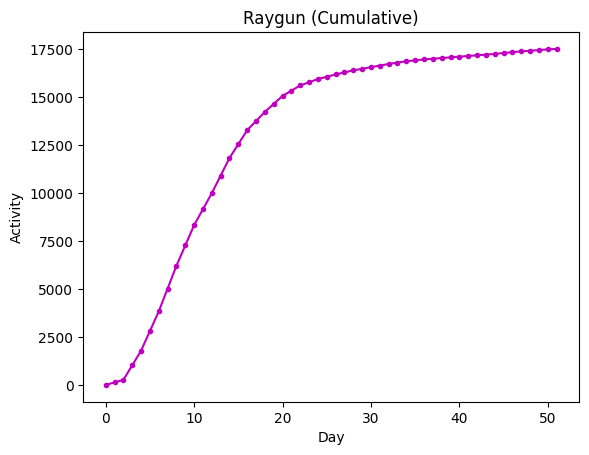

In [41]:
new_data_raygun_cumul = interpolator(data_raygun_cumul, 'Raygun (Cumulative)')
new_data_raygun_cumul

## Moo Deng:

Text(0, 0.5, 'Activity')

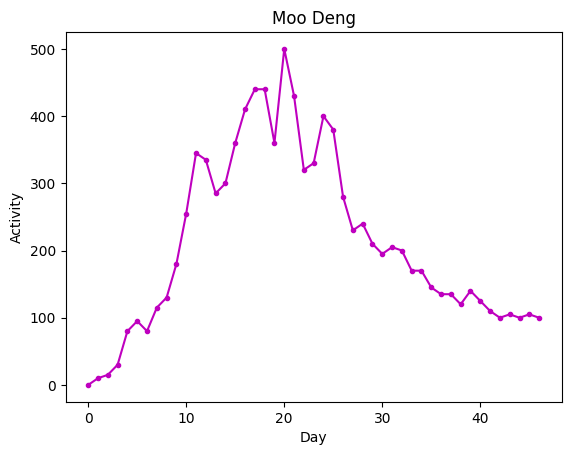

In [42]:
data_moo = pd.DataFrame(data_Google['moo_deng_scaled'])
data_moo = data_moo[46:].reset_index(drop=True)
plt.plot(data_moo, 'm.-')
plt.title('Moo Deng')
plt.xlabel('Day')
plt.ylabel('Activity')

    moo_deng_scaled
0                 0
1                10
2                25
3                55
4               135
5               230
6               310
7               425
8               555
9               735
10              990
11             1335
12             1670
13             1955
14             2255
15             2615
16             3025
17             3465
18             3905
19             4265
20             4765
21             5195
22             5515
23             5845
24             6245
25             6625
26             6905
27             7135
28             7375
29             7585
30             7780
31             7985
32             8185
33             8355
34             8525
35             8670
36             8805
37             8940
38             9060
39             9200
40             9325
41             9435
42             9535
43             9640
44             9740
45             9845
46             9945


Text(0, 0.5, 'Activity')

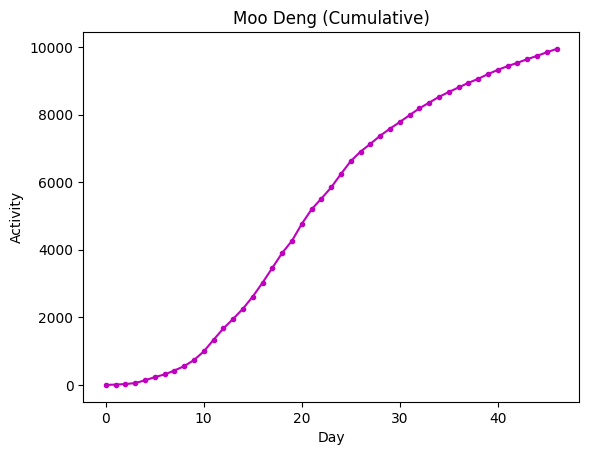

In [43]:
data_moo_cumul = np.cumsum(data_moo)
print(data_moo_cumul)
plt.plot(data_moo_cumul, 'm.-')
plt.title('Moo Deng (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,moo_deng_scaled
0,0.0
1,5.0
2,10.0
3,17.5
4,25.0
...,...
87,9690.0
88,9740.0
89,9792.5
90,9845.0


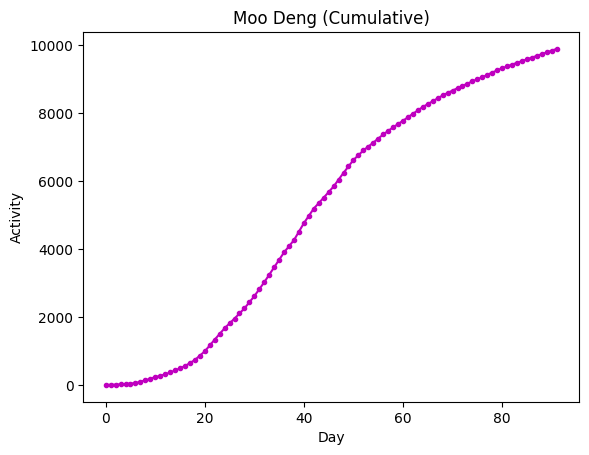

In [44]:
new_data_moo_cumul = interpolator(data_moo_cumul, 'Moo Deng (Cumulative)')
new_data_moo_cumul

## Christopher Columbus:

Text(0, 0.5, 'Activity')

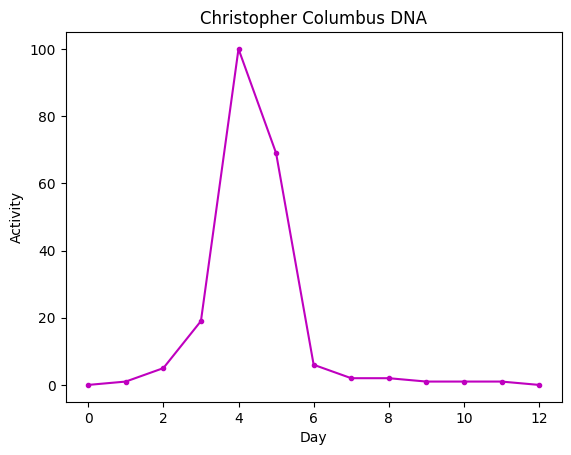

In [45]:
data_columb = pd.DataFrame(data_Google['columb_dna'])
data_columb = data_columb[77:90].reset_index(drop=True)
plt.plot(data_columb, 'm.-')
plt.title('Christopher Columbus DNA')
plt.xlabel('Day')
plt.ylabel('Activity')

    columb_dna
0            0
1            1
2            6
3           25
4          125
5          194
6          200
7          202
8          204
9          205
10         206
11         207
12         207


Text(0, 0.5, 'Activity')

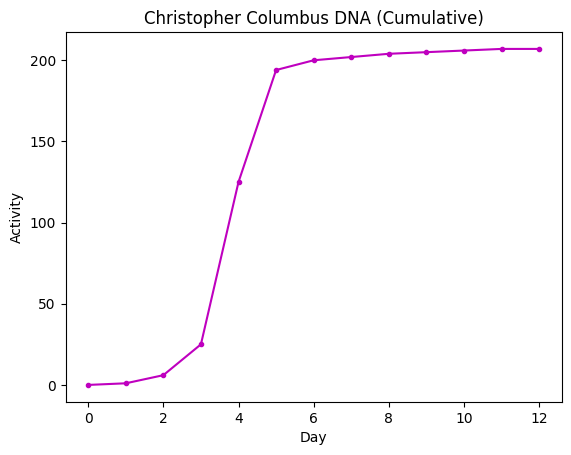

In [46]:
data_columb_cumul = np.cumsum(data_columb)
print(data_columb_cumul)
plt.plot(data_columb_cumul, 'm.-')
plt.title('Christopher Columbus DNA (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,columb_dna
0,0.0
1,0.5
2,1.0
3,3.5
4,6.0
5,15.5
6,25.0
7,75.0
8,125.0
9,159.5


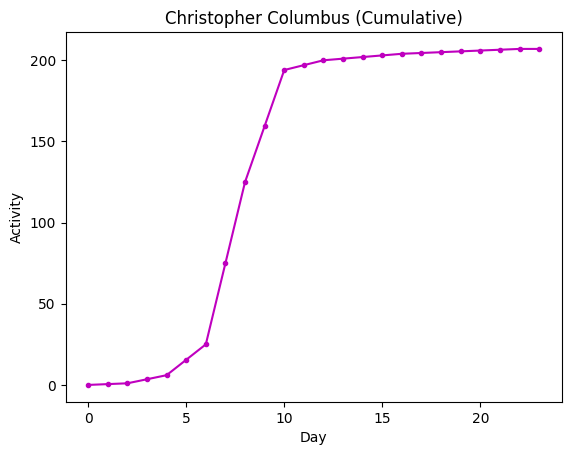

In [47]:
new_data_columb_cumul = interpolator(data_columb_cumul, 'Christopher Columbus (Cumulative)')
new_data_columb_cumul

## Trump:

Text(0, 0.5, 'Activity')

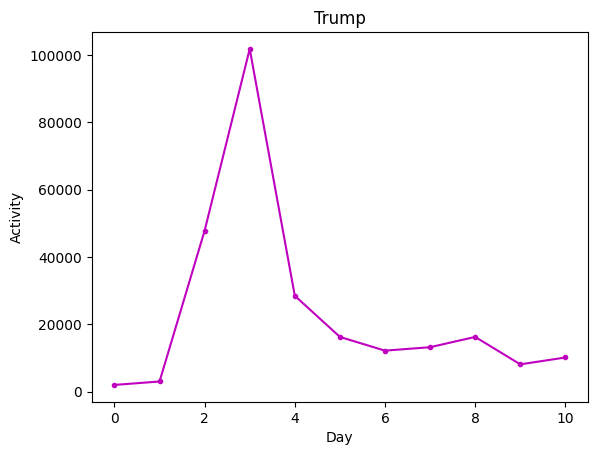

In [48]:
data_trump = pd.DataFrame(data_Google['trump_scaled'])
data_trump = data_trump[9:20].reset_index(drop=True)
# print(data_raygun)
plt.plot(data_trump, 'm.-')
plt.title('Trump')
plt.xlabel('Day')
plt.ylabel('Activity')

     trump_scaled
0     2035.002035
1     5087.505088
2    52910.052918
3   154660.154718
4   183150.183208
5   199430.199488
6   211640.211698
7   224867.724928
8   241147.741208
9   249287.749348
10  259462.759528


Text(0, 0.5, 'Activity')

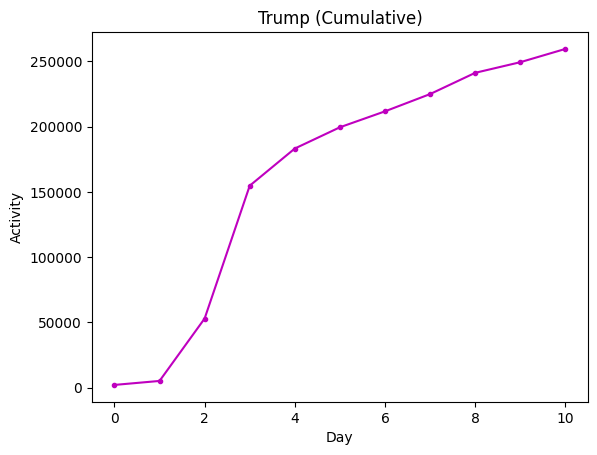

In [49]:
data_trump_cumul = np.cumsum(data_trump)
print(data_trump_cumul)
plt.plot(data_trump_cumul, 'm.-')
plt.title('Trump (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,trump_scaled
0,2035.002035
1,3561.253561
2,5087.505088
3,28998.779003
4,52910.052918
5,103785.103818
6,154660.154718
7,168905.168963
8,183150.183208
9,191290.191348


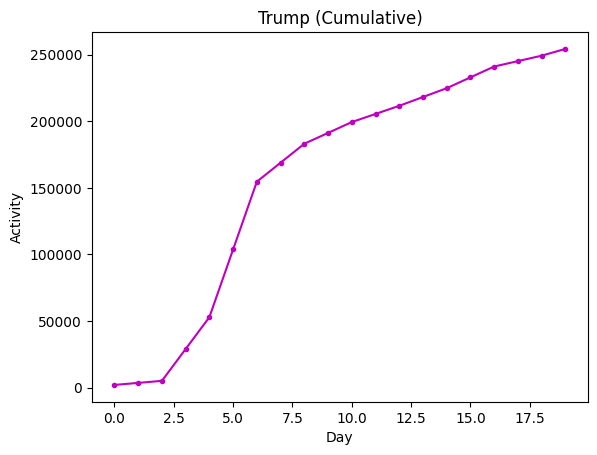

In [50]:
new_data_trump_cumul = interpolator(data_trump_cumul, 'Trump (Cumulative)')
new_data_trump_cumul

##Iran:

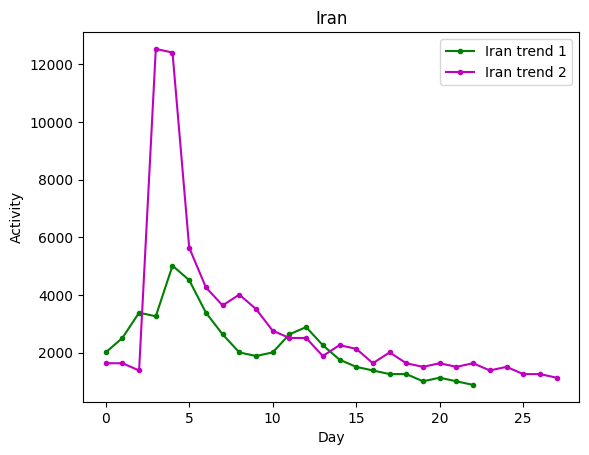

In [51]:
data_iran = pd.DataFrame(data_Google['iran_scaled'])
data_iran1 = data_iran[7:30].reset_index(drop=True)
data_iran2 = data_iran[65:].reset_index(drop=True)
# print(data_raygun)
plt.plot(data_iran1, 'g.-')
plt.plot(data_iran2, 'm.-')
plt.title('Iran')
plt.xlabel('Day')
plt.ylabel('Activity')
plt.legend(['Iran trend 1', 'Iran trend 2'])

     iran_scaled
0    1629.072682
1    3258.145364
2    4636.591480
3   17167.919800
4   29573.934840
5   35213.032585
6   39473.684214
7   43107.769427
8   47117.794490
9   50626.566420
10  53383.458651
11  55889.724315
12  58395.989979
13  60275.689227
14  62531.328325
15  64661.654140
16  66290.726822
17  68295.739354
18  69924.812036
19  71428.571435
20  73057.644117
21  74561.403516
22  76190.476198
23  77568.922314
24  79072.681713
25  80325.814545
26  81578.947377
27  82706.766926


Text(0, 0.5, 'Activity')

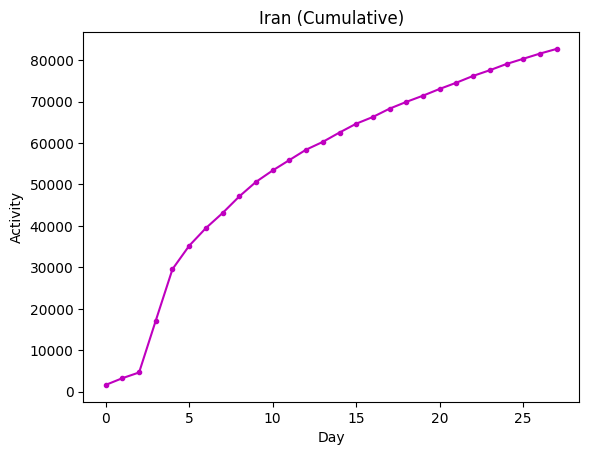

In [52]:
data_iran_cumul = np.cumsum(data_iran2)
print(data_iran_cumul)
plt.plot(data_iran_cumul, 'm.-')
plt.title('Iran (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,iran_scaled
0,1629.072682
1,2443.609023
2,3258.145364
3,3947.368422
4,4636.591480
5,10902.255640
6,17167.919800
7,23370.927320
8,29573.934840
9,32393.483713


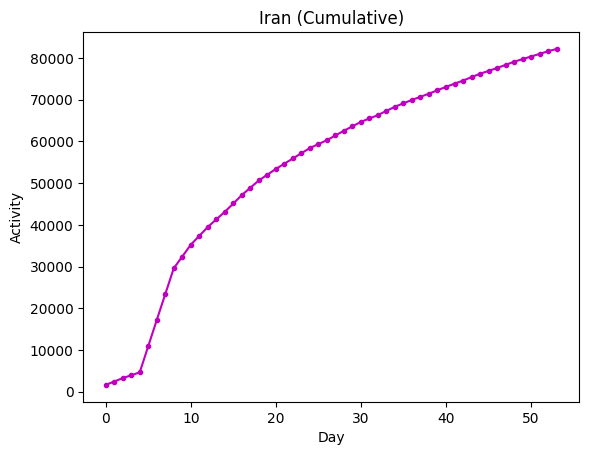

In [53]:
new_data_iran_cumul = interpolator(data_iran_cumul, 'Iran (Cumulative)')
new_data_iran_cumul

##BRICS:

Text(0, 0.5, 'Activity')

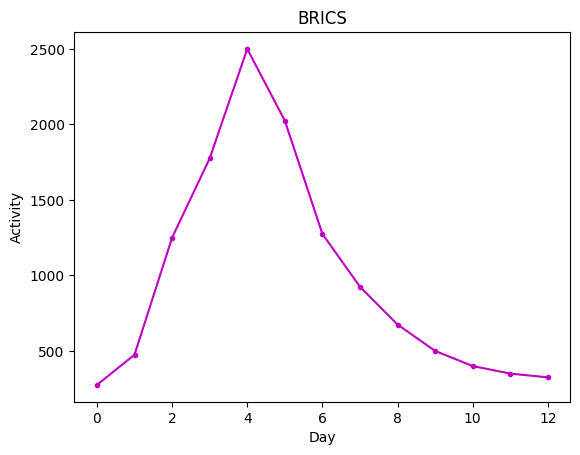

In [54]:
data_brics = pd.DataFrame(data_Google['brics'])
data_brics = data_brics[80:].reset_index(drop=True)
plt.plot(data_brics, 'm.-')
plt.title('BRICS')
plt.xlabel('Day')
plt.ylabel('Activity')

    brics
0     275
1     750
2    2000
3    3775
4    6275
5    8300
6    9575
7   10500
8   11175
9   11675
10  12075
11  12425
12  12750


Text(0, 0.5, 'Activity')

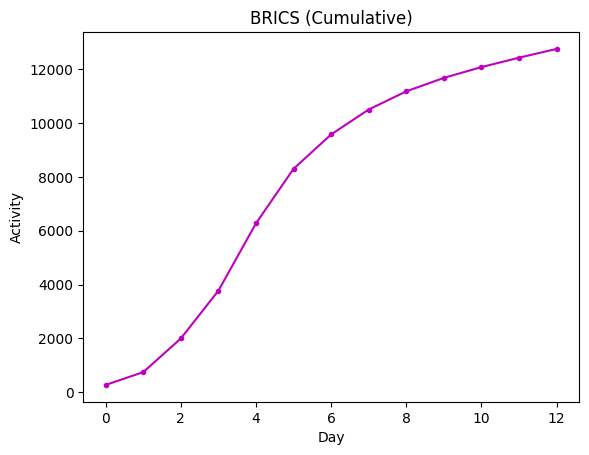

In [55]:
data_brics_cumul = np.cumsum(data_brics)
print(data_brics_cumul)
plt.plot(data_brics_cumul, 'm.-')
plt.title('BRICS (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,brics
0,275.0
1,512.5
2,750.0
3,1375.0
4,2000.0
5,2887.5
6,3775.0
7,5025.0
8,6275.0
9,7287.5


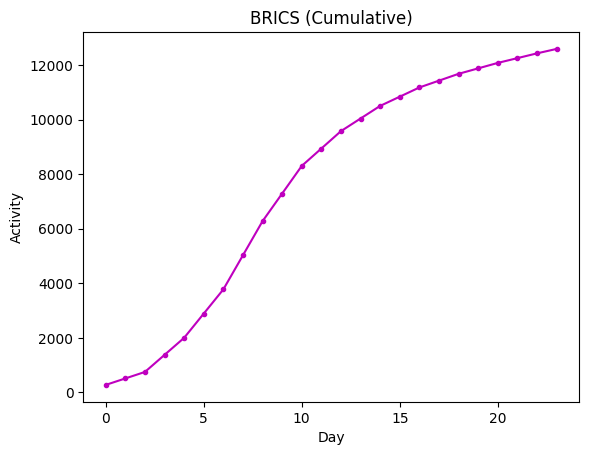

In [56]:
new_data_brics_cumul = interpolator(data_brics_cumul, 'BRICS (Cumulative)')
new_data_brics_cumul

## Mpox:

Text(0, 0.5, 'Activity')

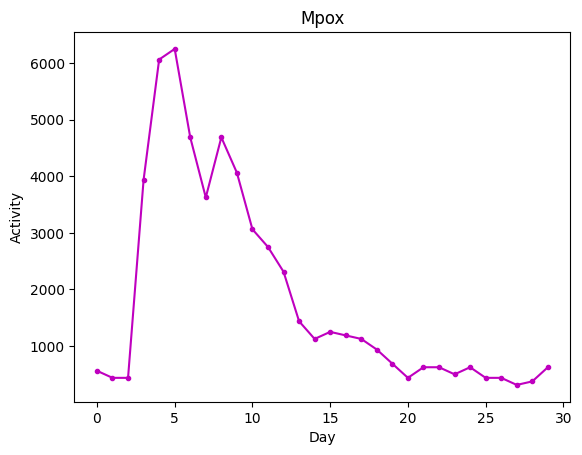

In [57]:
data_mpox = pd.DataFrame(data_Google['Mpox'])
data_mpox = data_mpox[10:40].reset_index(drop=True)
plt.plot(data_mpox, 'm.-')
plt.title('Mpox')
plt.xlabel('Day')
plt.ylabel('Activity')

       Mpox
0     562.5
1    1000.0
2    1437.5
3    5375.0
4   11437.5
5   17687.5
6   22375.0
7   26000.0
8   30687.5
9   34750.0
10  37812.5
11  40562.5
12  42875.0
13  44312.5
14  45437.5
15  46687.5
16  47875.0
17  49000.0
18  49937.5
19  50625.0
20  51062.5
21  51687.5
22  52312.5
23  52812.5
24  53437.5
25  53875.0
26  54312.5
27  54625.0
28  55000.0
29  55625.0


Text(0, 0.5, 'Activity')

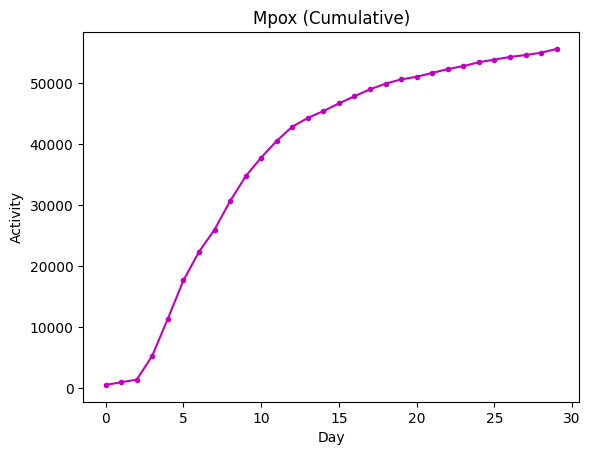

In [58]:
data_mpox_cumul = np.cumsum(data_mpox)
print(data_mpox_cumul)
plt.plot(data_mpox_cumul, 'm.-')
plt.title('Mpox (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,Mpox
0,562.50
1,781.25
2,1000.00
3,1218.75
4,1437.50
5,3406.25
6,5375.00
7,8406.25
8,11437.50
9,14562.50


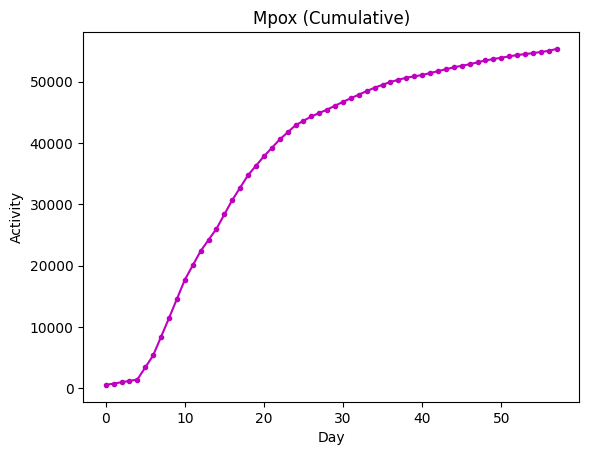

In [59]:
new_data_mpox_cumul = interpolator(data_mpox_cumul, 'Mpox (Cumulative)')
new_data_mpox_cumul

## Algorithm-Enhanced Model Fitting:

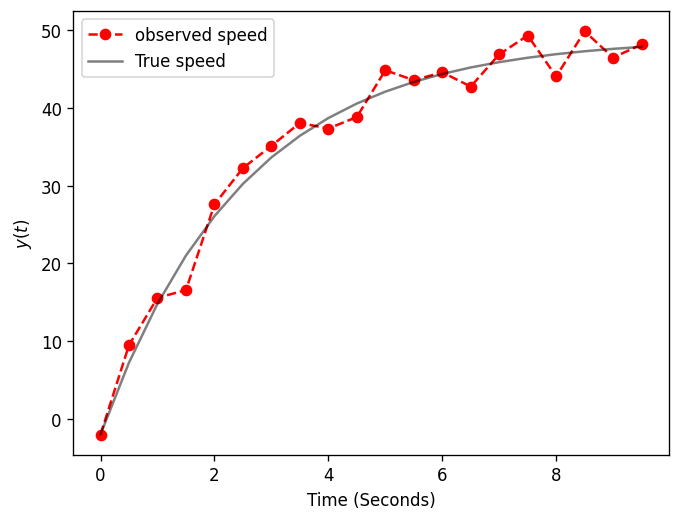

In [32]:
# Code from https://www.pymc.io/projects/examples/en/latest/ode_models/ODE_API_introduction.html

# For reproducibility
np.random.seed(20394)


def freefall(y, t, p):
    return 2.0 * p[1] - p[0] * y[0]

# def B_star(y, t, p):
#     return 250000 -  p[1]*y[0] - 250000 * np.exp(-p[0]*y[0])


# Times for observation
times = np.arange(0, 10, 0.5)


gamma, g, y0, sigma = 0.4, 9.8, -2, 2
y = odeint(freefall, t=times, y0=y0, args=tuple([[gamma, g]]))
yobs = np.random.normal(y, 2)

fig, ax = plt.subplots(dpi=120)
plt.plot(times, yobs, label="observed speed", linestyle="dashed", marker="o", color="red")
plt.plot(times, y, label="True speed", color="k", alpha=0.5)
plt.legend()
plt.xlabel("Time (Seconds)")
plt.ylabel(r"$y(t)$")
plt.show()

In [33]:
ode_model = DifferentialEquation(func=freefall, times=times, n_states=1, n_theta=2, t0=0)

with pm.Model() as model:
    # Specify prior distributions for some of our model parameters
    sigma = pm.HalfCauchy("sigma", 1)
    gamma = pm.Lognormal("gamma", 0, 1)

    # If we know one of the parameter values, we can simply pass the value.
    ode_solution = ode_model(y0=[0], theta=[gamma, 9.8])
    # The ode_solution has a shape of (n_times, n_states)

    Y = pm.Normal("Y", mu=ode_solution, sigma=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    # trace = pm.sample(2000, tune=1000, cores=1)
    trace = pm.sample(1000, tune=1000)
    # posterior_predictive = pm.sample_posterior_predictive(trace)
trace_df = trace.posterior.to_dataframe()
trace_df

Output()

Output()

ValueError: Not enough samples to build a trace.

In [ ]:
sns.boxplot(data=trace_df[['gamma', 'sigma']])

In [ ]:
ode_model = DifferentialEquation(func=freefall, times=times, n_states=1, n_theta=2, t0=0)

with pm.Model() as model2:
    sigma = pm.HalfCauchy("sigma", 1)
    gamma = pm.Lognormal("gamma", 0, 1)
    # A prior on the acceleration due to gravity
    g = pm.Lognormal("g", pm.math.log(10), 2)

    # Notice now I have passed g to the odeparams argument
    ode_solution = ode_model(y0=[0], theta=[gamma, g])

    Y = pm.Normal("Y", mu=ode_solution, sigma=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample(2000, tune=1000, target_accept=0.9, cores=1)
    posterior_predictive = pm.sample_posterior_predictive(trace)

    # data = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)
trace_df = trace.posterior.to_dataframe()
trace_df

## HERE IS WHERE IT DOESN'T WORK:

In [72]:
## Function defined in example. IT WORKS:
def freefall(y, t, p):
    return 2.0 * p[1] - p[0] * y[0]

pop = 2500

## My function (DOESN'T WORK):
def B_star(y, t, p):
    return 2.0 * p[1] - p[0] * y[0] -p[0]*y[0]**2
    # return pop -  p[1]*y[0]  - pop * np.exp(-p[0]*y[0])

In [77]:
# Code from https://www.pymc.io/projects/examples/en/latest/ode_models/ODE_API_introduction.html

times = np.arange(0, 30, 1)

ode_model = DifferentialEquation(func=B_star, times=times, n_states=1, n_theta=2, t0=0)

with pm.Model() as model:
    # Specify prior distributions for some of our model parameters
    sigma = pm.HalfCauchy("sigma", 1)
    beta = pm.Lognormal("beta", 0, 0.01)
    gamma = pm.Lognormal("gamma_1", 0, 0.01)

    # If we know one of the parameter values, we can simply pass the value.
    ode_solution = ode_model(y0=[0], theta=[beta, gamma])
    # The ode_solution has a shape of (n_times, n_states)

    Y = pm.Normal("Y", mu=ode_solution, sigma=sigma, observed= data_mpox_cumul) #new_data_mpox_cumul)

    prior = pm.sample_prior_predictive()
    # trace = pm.sample(2000, tune=1000, cores=1)
    trace = pm.sample(1000, tune=1000)
    # posterior_predictive = pm.sample_posterior_predictive(trace)
trace_df = trace.posterior.to_dataframe()
trace_df

KeyboardInterrupt: 

In [75]:
trace_df

beta   gamma_1         sigma
chain draw                                  
0     0     1.001771  0.972403  42478.918975
      1     0.998862  1.020680  60477.110278
      2     0.994821  0.980297  37660.944189
      3     1.006328  1.027040  42745.767728
      4     1.002153  1.012890  43310.347179
...              ...       ...           ...
1     995   1.013436  0.987315  43344.921306
      996   0.993009  1.002309  37622.354173
      997   1.001785  1.011429  49346.965497
      998   0.998512  0.988099  35606.461029
      999   1.004064  1.010745  48882.973379

[2000 rows x 3 columns]

<Axes: >

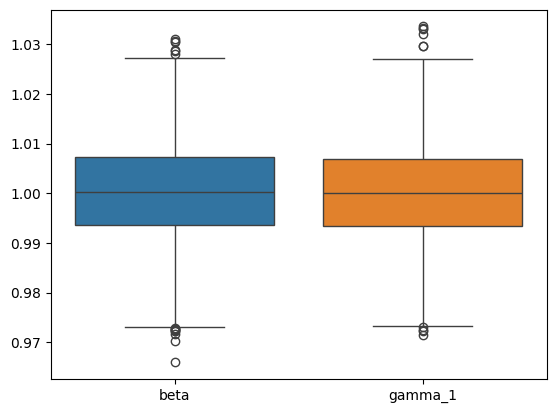

In [76]:
sns.boxplot(data=trace_df[['beta', 'gamma_1']])

In [5]:
def gamma_func(beta, B_star_val, pop, I0):
  gamma = 1/B_star_val * (pop - (pop-I0)*np.exp(-beta*B_star_val))
  if gamma > (pop-I0)*beta*np.exp(-beta*B_star_val):
    print("Asymp. Stable")
  else:
    print("Unstable")
  return gamma


In [6]:
beta = 0.000004
B_star_final = 200
pop = 250000
I0 = 1

gamma1 = gamma_func(beta, B_star_final, pop, I0)
gamma1

Asymp. Stable


1.0045961082448776

In [30]:
def ODE_Bstar(t, y, beta, gamma, pop, I0):
    # return 2.0 * p[1] - p[0] * y[0] -p[0]*y[0]**2
    y = B
    dBdt = [pop -  gamma*B - (pop-I0) * np.exp(-beta*B)]
    return dBdt

B0 = 0

def model_solver(mod, t, beta, gamma, pop, I0):
    Solution = pd.DataFrame()
    sol=scipy.integrate.odeint(mod,B0,t,args=(beta,gamma, pop, I0))
    sol=np.array(sol)
    Solution['time']=t
    Solution['B*'] = sol
    return Solution

In [31]:
t = np.linspace(0, 300, 3001)
beta = 0.000004
B_star_final = 200
pop = 250000
I0 = 1
gamma1 = gamma_func(beta, B_star_final, pop, I0)
print(gamma1)

B_star_solved = model_solver(ODE_Bstar, t, beta, gamma1, pop, I0)

Asymp. Stable
1.0045961082448776


NameError: name 'B' is not defined

In [48]:
# B0=0
# t = np.linspace(0, 1000, 1001)
# beta = 0.000004
# B_star_final = 200
# pop = 250000
# I0 = 1
# gamma = gamma_func(beta, B_star_final, pop, I0)
# print(gamma)

def dBdt(t, B):
    # return 2.0 * p[1] - p[0] * y[0] -p[0]*y[0]**2
    return pop -  gamma*B - (pop-I0) * np.exp(-beta*B)

def model_solver(mod, times, beta, B_star_final, pop, I0):
    B0=0
    t = np.linspace(0, 1000, 1001)
    gamma = gamma_func(beta, B_star_final, pop, I0)
    sol = scipy.integrate.odeint(dBdt, y0=0, t=times, tfirst=True)
    return sol

In [43]:
def model_solver(mod, times, beta, B_star_final, pop, I0):
    B0=0
    t = np.linspace(0, 1000, 1001)
    gamma = gamma_func(beta, B_star_final, pop, I0)
    sol = scipy.integrate.odeint(dBdt, y0=0, t=times, tfirst=True)
    return sol

In [49]:
t = np.linspace(0, 1000, 1001)
beta = 0.000004
B_star_final = 200
pop = 250000
I0 = 1

sol_m1=model_solver(dBdt, t, beta, B_star_final, pop, I0)

Asymp. Stable


In [50]:
sol_m1

array([[  0.        ],
       [  0.9977028 ],
       [  1.99082265],
       ...,
       [199.01402443],
       [199.01933221],
       [199.02461142]])

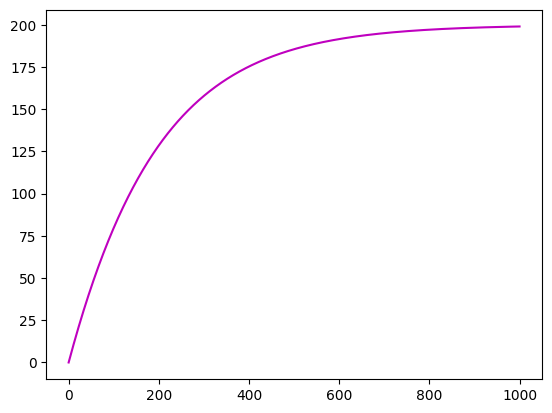

In [51]:
sol_m1
plt.plot(sol_m1, 'm-')

In [29]:
B_star_solved

,time,B*
0,0.0,0.000000
1,0.1,0.099977
2,0.2,0.199908
3,0.3,0.299793
4,0.4,0.399632
...,...,...
2996,299.6,75.224120
2997,299.7,75.168326
2998,299.8,75.112475
2999,299.9,75.056567


0.5199919219012372


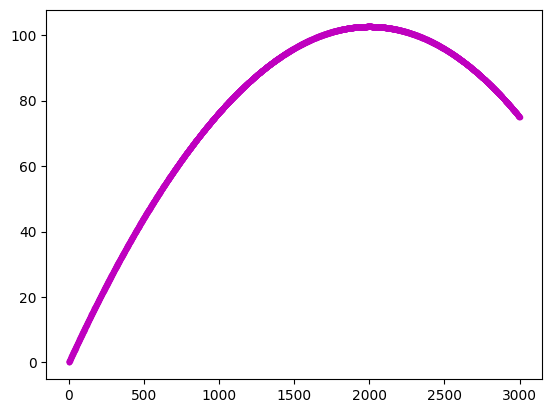

In [25]:
plt.plot(B_star_solved['B*'], 'm.')

0       1.000000
1       0.999540
2       0.999080
3       0.998621
4       0.998161
          ...   
2996    0.642645
2997    0.642918
2998    0.643192
2999    0.643466
3000    0.643740
Name: B*, Length: 3001, dtype: float64


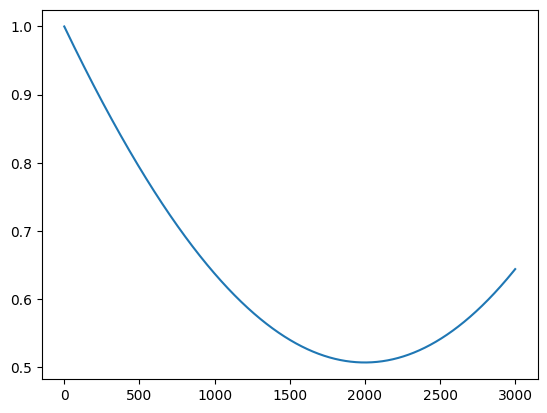

In [26]:
diff = pop -  gamma1*B_star_solved['B*'] - (pop-I0) * np.exp(-beta*B_star_solved['B*'])
print(diff)
plt.plot(diff)